In [4]:


library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(tidyr)
library(ggpubr)

library(readxl)
library(patchwork)
library(RColorBrewer)
library(viridis)

In [5]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/Eva/opt/anaconda3/envs/R4b/lib/libopenblasp-r0.3.26.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: system (macOS)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] viridis_0.6.4      viridisLite_0.4.2  RColorBrewer_1.1-3 patchwork_1.1.2   
 [5] readxl_1.4.3       ggpubr_0.6.0       ggplot2_3.5.0      tidyr_1.3.1       
 [9] cowplot_1.1.1      stringr_1.5.1      rio_1.0.1          dplyr_1.1.4       

loaded via a namespace (and not attached):
 [1] utf8_1.2.4       generics_0.1.3   rstatix_0.7.2    stringi_1.8.3   
 [5] digest_0.6.35    magrittr_2.0.3   evaluate_0.23    grid_4.3.1      
 [9] pbdZMQ_0.3-11    fastmap_1.1.1    cellranger_1.1.0 jsonlite_1.

# Import data
Importing average expression per time point and condition. 

### ATL SD/LD Leaf Tuber expression data

In [6]:

#:::::::::::::::::::::::::::::::::::::
SDLD <- import(file = 
('~/Dropbox/Potato/RNA-seq_2/RNAseq_analysis/NetworkAnalyses/ATL_diel_norm_tables_rlog/Results/ATL_diel_norm_avsd_expressed.csv'), 
                   sep =',', header = TRUE, fill = TRUE )




In [7]:
SDLD[1:2,]

,geneID,ZT,Tissue,Condition,mean_expression,std,Average,SD,target_id
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Soltu.Atl_v3.01_0G000010.1,0,Leaf,LD,0.5476810,0.8181291,0.7458996,0.4044651,Soltu.Atl_v3.01_0G000010
2,Soltu.Atl_v3.01_0G000010.1,0,Leaf,SD,0.2047125,0.0629064,1.7492942,0.9515069,Soltu.Atl_v3.01_0G000010


### Get allelic group information

In [8]:
#### Get syntelogs ####
#::::::::::::::::::::::::::

SYN<- import(file = '~/Dropbox/Potato/RNA-seq_2/RNAseq_analysis/Data/GeneLists/Syntelogs_Ann/syntelogs_atl_good.csv', sep =',', header = TRUE, fill = TRUE )

In [9]:
# Check file 
#::::::::::::;;
SYN[1:2,]

,V1,Syntelog,geneID,Species
,<int>,<chr>,<chr>,<chr>
1,0,Synt_0,Soltu.DM.01G000010.5,
2,1,Synt_0,Solca.01G000010.5,


In [10]:
# Select only the necessary columns
#:::::::::::::::::::
SYN <- SYN %>% select(Syntelog, geneID)

In [11]:
### Add syntelog information 
# Make a target_id column 

SYN <- SYN %>% mutate(target_id = geneID)

In [12]:
#Remove transcript information from SYN$target_id

## REMOVE transcript version for versions from .1-.99 

SYN$target_id<-lapply(SYN$target_id,
                             function (i){if (str_sub(i,-2,-2) == ".")
                                             { i<- str_sub(i, end = -3)} # i.e. the last character will be -3 position
                                          else if ((str_sub(i,-3,-3) == "."))
                                               { i<- str_sub(i, end = -4)} # i.e. the last character will be -4 position
                                        else {i<-i}
                                          
                                        })


SYN$target_id <- as.character(SYN$target_id)
SYN[1:2,]

,Syntelog,geneID,target_id
,<chr>,<chr>,<chr>
1,Synt_0,Soltu.DM.01G000010.5,Soltu.DM.01G000010
2,Synt_0,Solca.01G000010.5,Solca.01G000010


### Add syntelog information to expression table

In [13]:
# Add Syntelog information
#::::::::::::::::::::::::::::::::
SDLDs <- SDLD %>% left_join(SYN %>% select(target_id, Syntelog) , by = 'target_id')
SDLDs[1:2,]

,geneID,ZT,Tissue,Condition,mean_expression,std,Average,SD,target_id,Syntelog
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Soltu.Atl_v3.01_0G000010.1,0,Leaf,LD,0.5476810,0.8181291,0.7458996,0.4044651,Soltu.Atl_v3.01_0G000010,NA
2,Soltu.Atl_v3.01_0G000010.1,0,Leaf,SD,0.2047125,0.0629064,1.7492942,0.9515069,Soltu.Atl_v3.01_0G000010,NA


In [14]:
SDLDs %>% filter (Syntelog == 'Synt_1')%>% head()

,geneID,ZT,Tissue,Condition,mean_expression,std,Average,SD,target_id,Syntelog
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Soltu.Atl_v3.01_1G000020.2,0,Leaf,LD,7.716925,0.11467405,7.395377,0.1577245,Soltu.Atl_v3.01_1G000020,Synt_1
2,Soltu.Atl_v3.01_1G000020.2,0,Leaf,SD,7.793533,0.04139255,7.782333,0.1618439,Soltu.Atl_v3.01_1G000020,Synt_1
3,Soltu.Atl_v3.01_1G000020.2,0,Tuber,SD,7.343085,0.09682409,7.703916,0.1453143,Soltu.Atl_v3.01_1G000020,Synt_1
4,Soltu.Atl_v3.01_1G000020.2,2,Leaf,LD,7.537484,0.13511076,7.395377,0.1577245,Soltu.Atl_v3.01_1G000020,Synt_1
5,Soltu.Atl_v3.01_1G000020.2,2,Leaf,SD,7.709400,0.18400881,7.782333,0.1618439,Soltu.Atl_v3.01_1G000020,Synt_1
6,Soltu.Atl_v3.01_1G000020.2,2,Tuber,SD,7.814368,0.12900874,7.703916,0.1453143,Soltu.Atl_v3.01_1G000020,Synt_1


### Add haplotype information column

In [15]:
SDLDsg <- SDLDs %>% mutate(Genome = case_when(str_detect(target_id, '_1G') ~ 'ATL_H1',
                                             str_detect(target_id, '_2G') ~ 'ATL_H2',
                                             str_detect(target_id, '_3G') ~ 'ATL_H3',
                                              str_detect(target_id, '_4G') ~ 'ATL_H4',
                                              str_detect(target_id, '_0G') ~ 'ATL_0G',
                                             str_detect(target_id, 'v3.S') ~ 'ATL_S0'))
                                 

# Define plot functions

## SDLD ribbon plot one panel per transcript

In [16]:
#Defining ribbon SDLD plot 
#::::::::::::::::::::::::::::::::::::


SDLD_ribbon_plot_multiple <- function(df,Abbreviation, columns) {

plot_clock <- df %>% ## NOTE you cannot filter in function as variable needs to be in quotes
  ggplot(.,aes(x=ZT,y=mean_expression,col=Condition))+ # this means that all colors below are determined by Condition
   
    geom_vline(xintercept = 16, linetype="dotted", 
                color = '#000000')+
        geom_vline(xintercept = 12, 
                color = '#000000')+ 
  geom_line(aes(x=ZT,y=mean_expression,col =Condition, group = Condition))+ #group will separate different genes from the same Condition
  geom_ribbon(aes(ymin=mean_expression-std,ymax=mean_expression+std, fill = Condition, group = Condition),alpha=0.2, linetype = 0)+
  facet_wrap(~target_id, scales = 'free_y', ncol = columns)+
  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE)+

  scale_y_continuous()+
  scale_x_continuous(breaks=c(0,12,16,24))+
  labs(y="Average Expression (rlog)", x="ZT (h)", title = Abbreviation)+
     scale_color_manual(values = c('SD' = '#33539E',     
                                   'LD'='#A5678E'))+ 
                                 
    scale_fill_manual(values = alpha(c('SD' = '#33539E',     
                                   'LD'='#A5678E'))) 
   
}


## Multiple transcripts in one plot, z-score normalized: SDLD_z_onePlot 


In [17]:
#Defining SDLD plot for multiple traces in one plot USING Z-SCORE
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SDLD_z_onePlot <- function(df,Title) {

plot_clock <- df %>% ## NOTE you cannot filter in function as variable needs to be in quotes
    group_by(Condition, target_id) %>% 
    mutate(Z_score = (mean_expression - Average)/SD) %>%
    ungroup() %>% 
  ggplot(.,aes(x=ZT,y=Z_score,col=Condition))+ # this means that all colors below are determined by Condition
   
    geom_vline(xintercept = 16, linetype="dotted", 
                color = '#000000')+
        geom_vline(xintercept = 12, 
                color = '#000000')+ 
  geom_line(aes(x=ZT,y=Z_score,col =Condition, group = interaction(target_id,Condition)))+ #group will separate different genes from the same Abbreviation
 
  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE)+
       #legend.position="bottom")+
  scale_y_continuous()+
  scale_x_continuous(breaks=c(0,12,16,24))+
  labs(y=expression(paste(italic("z"),"-score", )), x="ZT (h)", title = Title)+
    
    
   scale_color_manual(values = c('SD' = '#33539E',    
                                   'LD'='#A5678E'))+ 
                                 
    scale_fill_manual(values = alpha(c('SD' = '#33539E',    
                                   'LD'='#A5678E'))) +
                
    
     theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                strip.text.x = element_text(size = 20),
            legend.text = element_text(size = 20),
            legend.title = element_text(size = 20),
                
                plot.title= element_text(size = 20),
            guide_legend(override.aes = list(linewidth = 10)),
            #guides(colour = guide_legend(override.aes=list(linewith=10))))
            #legend.key = element_blank(), 
            legend.key.width = unit(2,"line"))
    
       
}


## Multiple transcripts in one plot, rlog values: SDLD_rlog_onePlot

In [18]:
#Defining SDLD plot for multiple in one plot USING RLOG
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SDLD_rlog_onePlot_single <- function(df,Title) {

plot_clock <- df %>% ## NOTE you cannot filter in function as variable needs to be in quotes
    group_by(Condition, target_id) %>% 
  ggplot(.,aes(x=ZT,y=mean_expression,col=Condition))+ # this means that all colors below are determined by Condition
  
    geom_vline(xintercept = 16, linetype="dotted", 
                color = '#000000')+
        geom_vline(xintercept = 12, 
                color = '#000000')+ 
  geom_line(aes(x=ZT,y=mean_expression,col =Condition, group = interaction(target_id,Condition)))+ #group will separate different genes from the same Abbreviation

  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE)+
      
  scale_y_continuous()+
  scale_x_continuous(breaks=c(0,12,16,24))+
  labs(y="Average Expression (rlog)", x="ZT (h)", title = Title)+
  scale_color_manual(values = c('SD' = '#33539E',    
                                   'LD'='#A5678E'))+ 
                                 
    scale_fill_manual(values = alpha(c('SD' = '#33539E',     
                                   'LD'='#A5678E'))) +
     theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                strip.text.x = element_text(size = 20),
            legend.text = element_text(size = 14),
            legend.title = element_text(size = 14),
                
                plot.title= element_text(size = 20),
            guide_legend(override.aes = list(linewidth = 10)),
            #guides(colour = guide_legend(override.aes=list(linewith=10))))
            #legend.key = element_blank(), 
            legend.key.width = unit(2,"line"))
    
       
}


## Multiple transcripts in one plot, average rlog values & ribbon: SDLD_rlog_ribbon_onePlot

In [19]:
#Defining ribbon SDLD plot for multiple in one plot USING MEAN EXPRESSION ACROSS ALL GENES IN LIST
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SDLD_rlog_ribbon_onePlot <- function(df, Title) {

plot_clock <- df %>% ## NOTE you cannot filter in function as variable needs to be in quotes
    group_by(ZT, Condition) %>%
    summarize(Mean_Expr = mean(mean_expression),  # calculates mean expression across multiple transcripts/alleles
              SE = sd(mean_expression)/sqrt(n()))%>%
   # ungroup() %>% 
  ggplot(.,aes(x=ZT,y=Mean_Expr,col=Condition))+ # this means that all colors below are determined by Condition
    #geom_rect(aes(xmin= 12,
                #  xmax = 24,
                 # ymin = -Inf,
                  #ymax = Inf), 
                 #fill = 'grey', alpha = 0.25, color = NA) +
    geom_vline(xintercept = 16, linetype="dotted", 
                color = '#000000')+
        geom_vline(xintercept = 12, #linetype="dotted", 
                color = '#000000')+ #, linewidth=0.25
  geom_line(aes(x=ZT,y=Mean_Expr,col =Condition))+ #group will separate different genes from the same Abbreviation
  geom_ribbon(aes(ymin=Mean_Expr-SE,ymax=Mean_Expr+SE, fill = Condition, group = Condition),alpha=0.2, linetype = 0)+ # Erro bar
 # facet_wrap(~target_id, scales = 'free_y', ncol = columns)+
  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE)+
       #legend.position="bottom")+
  scale_y_continuous()+
  scale_x_continuous(breaks=c(0,12,16,24))+
  labs(y="Average Expression (rlog)", x="ZT (h)", title = Title)+
     scale_color_manual(values = c('SD' = '#33539E',     #'#5D3FD3', #purple
                                   'LD'='#A5678E'))+ #'#EE7733' organge
                                 
    scale_fill_manual(values = alpha(c('SD' = '#33539E',     #'#5D3FD3', #purple
                                   'LD'='#A5678E'))) +#'#EE7733' organge
     theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                strip.text.x = element_text(size = 20),
            legend.text = element_text(size = 14),
            legend.title = element_text(size = 14),
                plot.title = element_text(size = 20),
            guide_legend(override.aes = list(linewidth = 10)),
            #guides(colour = guide_legend(override.aes=list(linewith=10))))
            #legend.key = element_blank(), 
            legend.key.width = unit(2,"line"))
    
       
}

# Potential regulators of increases in amplitude under long day conditions

In [20]:
LargeAmpDiff_Regulators <- import(file= '../ATL_Diel_Phase_Aplitude_Analyses/Results/LargeAmpDiff_Regulators.csv', 
sep =',', header = TRUE, fill = TRUE)

In [78]:
LargeAmpDiff_Regulators

,geneID,LD,SD,AmpDiff,log2FoldChange,padj,Annotation,NAME
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Soltu.Atl_v3.06_1G009840.1,1.1533603,3.243600,2.090240,-1.6484794,0.0044170562,basic helix-loop-helix (bHLH) DNA-binding superfamily protein,RNA biosynthesis.DNA-binding transcriptional regulation.basic DNA-binding domain.basic helix-loop-helix (bHLH) domain.bHLH class-VIIIb transcription factor
2,Soltu.Atl_v3.06_4G014240.1,1.1533603,3.243600,2.090240,-1.6484794,0.0044170562,basic helix-loop-helix (bHLH) DNA-binding superfamily protein,RNA biosynthesis.DNA-binding transcriptional regulation.basic DNA-binding domain.basic helix-loop-helix (bHLH) domain.bHLH class-VIIIb transcription factor
3,Soltu.Atl_v3.09_0G011860.2,1.0972224,2.159120,1.061897,-0.9511461,0.0210083995,heat shock transcription factor A6B,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.HSF transcription factor
4,Soltu.Atl_v3.10_0G000150.1,2.7717556,4.150069,1.378314,-2.1936438,0.0096011554,circadian clock associated,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.tryptophan-cluster structure.REVEILLE-type transcription factor
5,Soltu.Atl_v3.10_1G000100.1,2.2090861,3.636281,1.427195,-2.1854705,0.0165103478,circadian clock associated,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.tryptophan-cluster structure.REVEILLE-type transcription factor
6,Soltu.Atl_v3.02_3G009730.2,1.2616107,2.386993,1.125383,-2.0985937,0.0001289896,cycling DOF factor,RNA biosynthesis.DNA-binding transcriptional regulation.zinc-coordinating DNA-binding domain.DOF transcription factor
7,Soltu.Atl_v3.02_3G009730.2,1.2616107,2.386993,1.125383,-2.0985937,0.0001289896,cycling DOF factor,Plant organogenesis.flower formation.photoperiodic pathway.transcriptional regulator *(CDF)
8,Soltu.Atl_v3.09_0G011770.2,1.0972224,2.159120,1.061897,-0.9511461,0.0210083995,heat shock transcription factor A6B,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.HSF transcription factor
9,Soltu.Atl_v3.09_0G011780.1,0.9449799,2.131904,1.186925,-0.7237754,0.0619757228,heat shock transcription factor A6B,RNA biosynthesis.DNA-binding transcriptional regulation.helix-turn-helix DNA-binding domain.HSF transcription factor


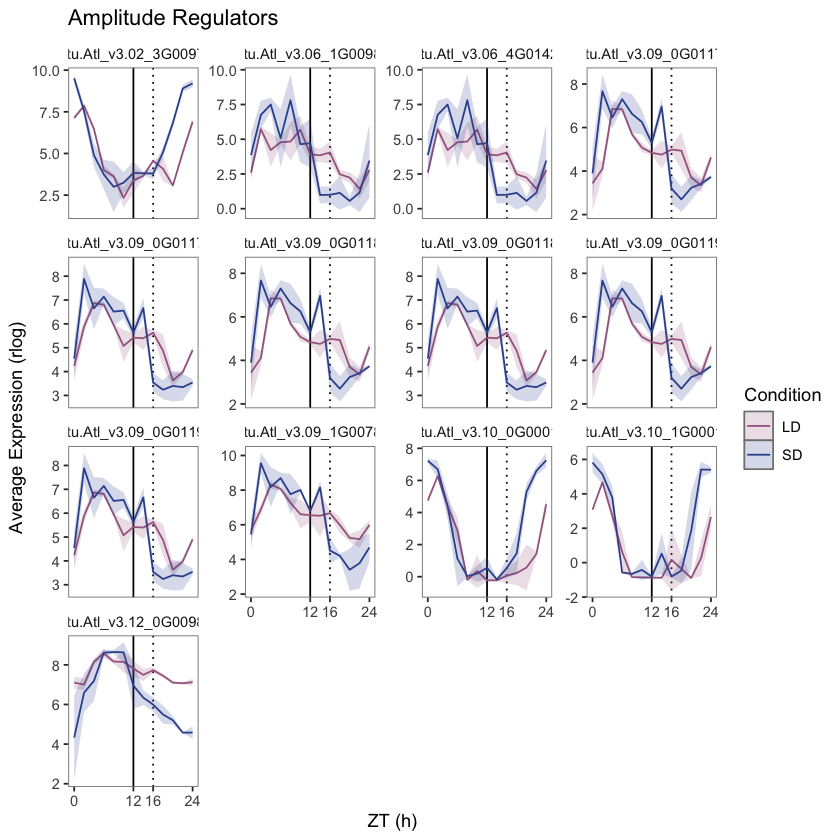

In [22]:
## Plot SD vs LD
LargeAmpDiff_Regulators_plot <- SDLDsg %>% filter (geneID %in% LargeAmpDiff_Regulators$geneID) %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple('Amplitude Regulators',4)
LargeAmpDiff_Regulators_plot 

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


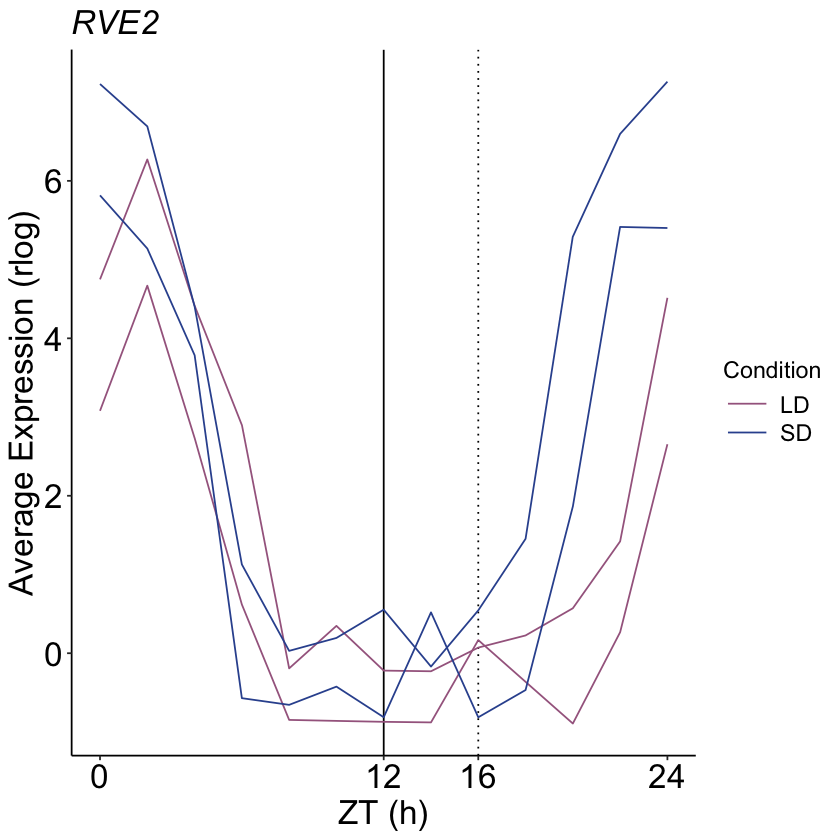

In [74]:
## Plot the RVE transcripts
#:::::::::::::::::::::::::::
LargeAmpDiff_RVE_plot <- SDLDsg %>% 
    filter (geneID %in% (LargeAmpDiff_Regulators %>% filter(str_detect(NAME , 'REVEILLE')) %>% pull(geneID))) %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                       # SDLD_rlog_ribbon_onePlot ('RVE')
SDLD_rlog_onePlot_single(expression(italic('RVE2')))
LargeAmpDiff_RVE_plot 

In [79]:
LargeAmpDiff_RVE_plot %>% ggsave(file="./Results/LargeAmpDiff_RVE_plot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


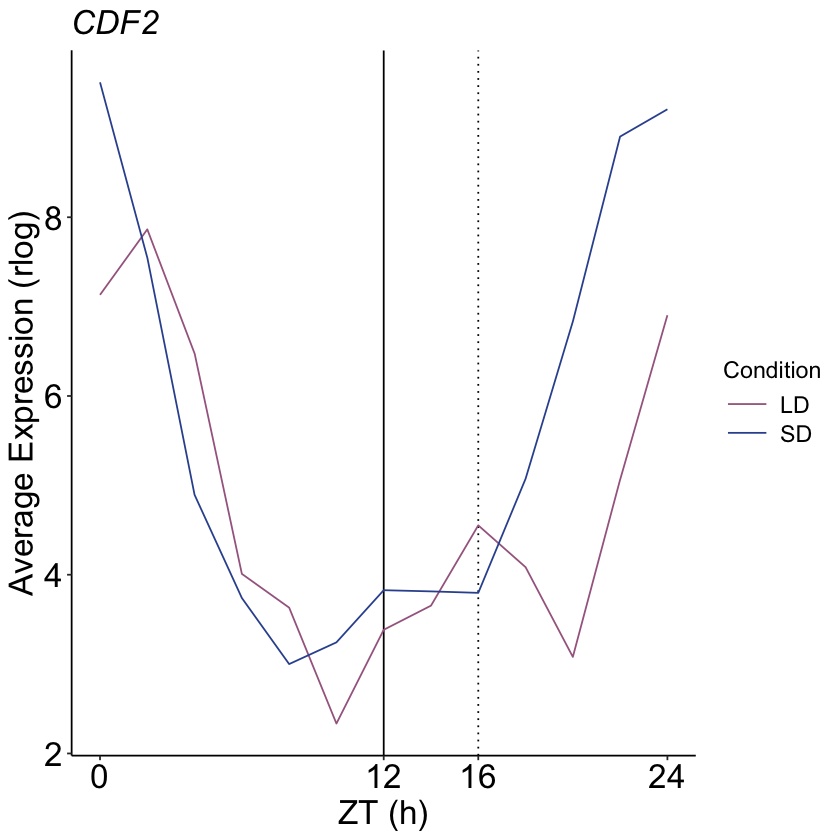

In [75]:
## Plot the CDF2 transcript
#:::::::::::::::::::::::::::::::
LargeAmpDiff_CDF_plot <- SDLDsg %>% 
    filter (geneID %in% (LargeAmpDiff_Regulators %>% filter(Annotation == 'cycling DOF factor') %>% pull(geneID))) %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        #SDLD_rlog_ribbon_onePlot ('CDF2')

SDLD_rlog_onePlot_single(expression(italic('CDF2')))
LargeAmpDiff_CDF_plot 

In [80]:
LargeAmpDiff_CDF_plot %>% ggsave(file="./Results/LargeAmpDiff_CDF_plot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


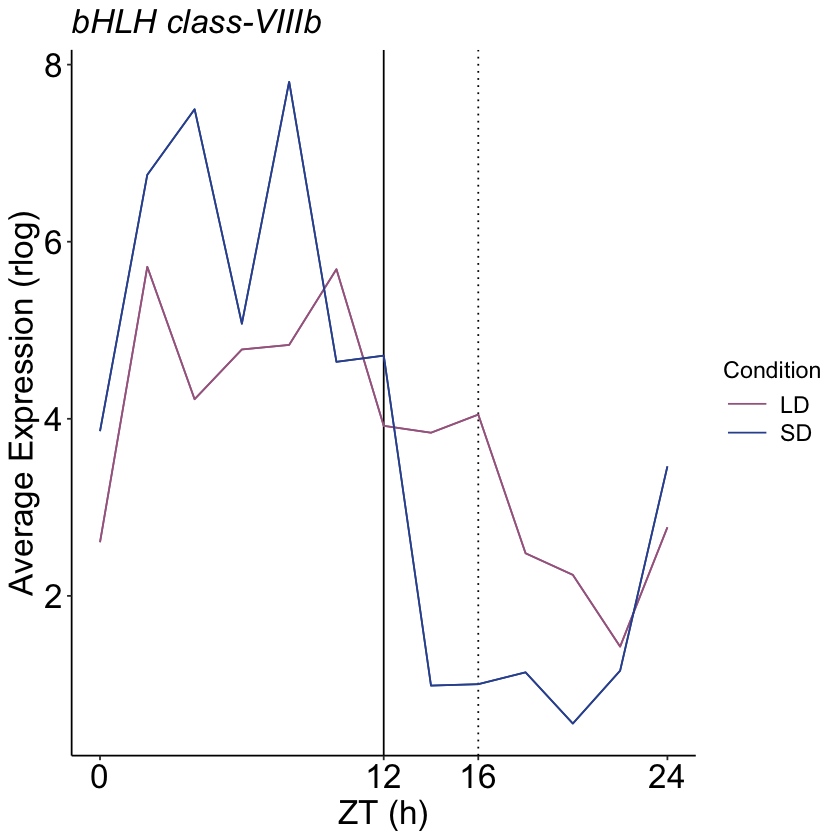

In [76]:

## Plot the bHLH class-VIIIb  transcripts
#:::::::::::::::::::::::::::::::::::::::::::

LargeAmpDiff_bHLH_plot <- SDLDsg %>% 
    filter (geneID %in% (LargeAmpDiff_Regulators %>% filter(str_detect(NAME,'bHLH class-VIIIb')) %>% pull(geneID))) %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        #SDLD_rlog_ribbon_onePlot ('bHLH class-VIIIb')

SDLD_rlog_onePlot_single(expression(italic('bHLH class-VIIIb')))
LargeAmpDiff_bHLH_plot 

In [81]:
LargeAmpDiff_bHLH_plot %>% ggsave(file="./Results/LargeAmpDiff_bHLH_plot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


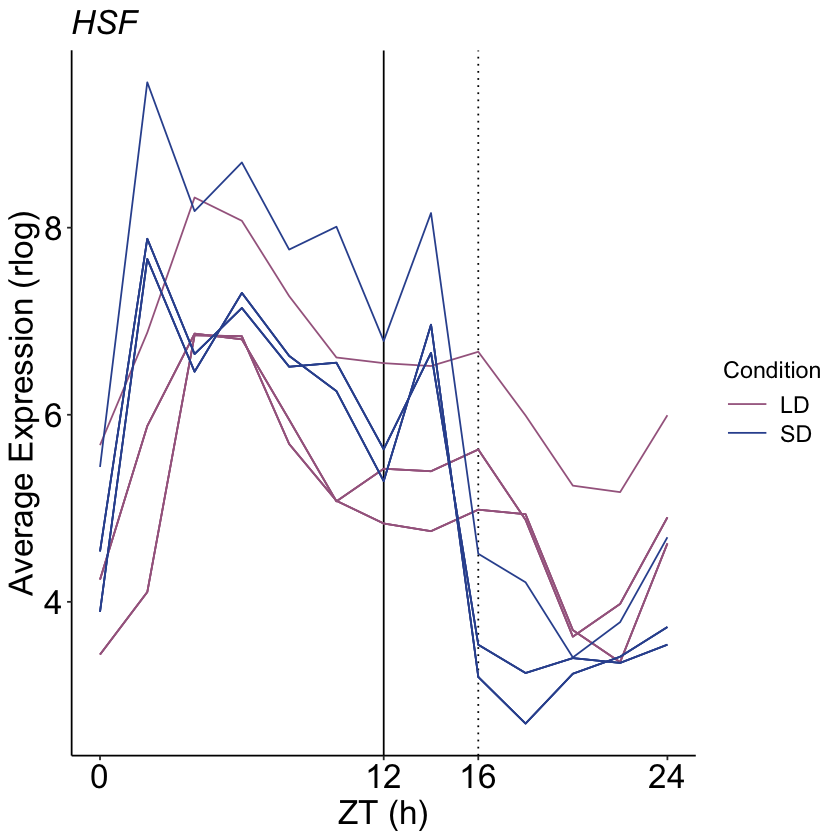

In [77]:

## Plot the HSF  transcripts
#:::::::::::::::::::::::::::::::::::::::::::

LargeAmpDiff_HSF_plot <- SDLDsg %>% 
    filter (geneID %in% (LargeAmpDiff_Regulators %>% filter(str_detect(NAME,'HSF')) %>% pull(geneID))) %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                      #  SDLD_rlog_ribbon_onePlot ('HSF')
SDLD_rlog_onePlot_single(expression(italic('HSF')))

LargeAmpDiff_HSF_plot 

In [82]:
LargeAmpDiff_HSF_plot %>% ggsave(file="./Results/LargeAmpDiff_HSF_plot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


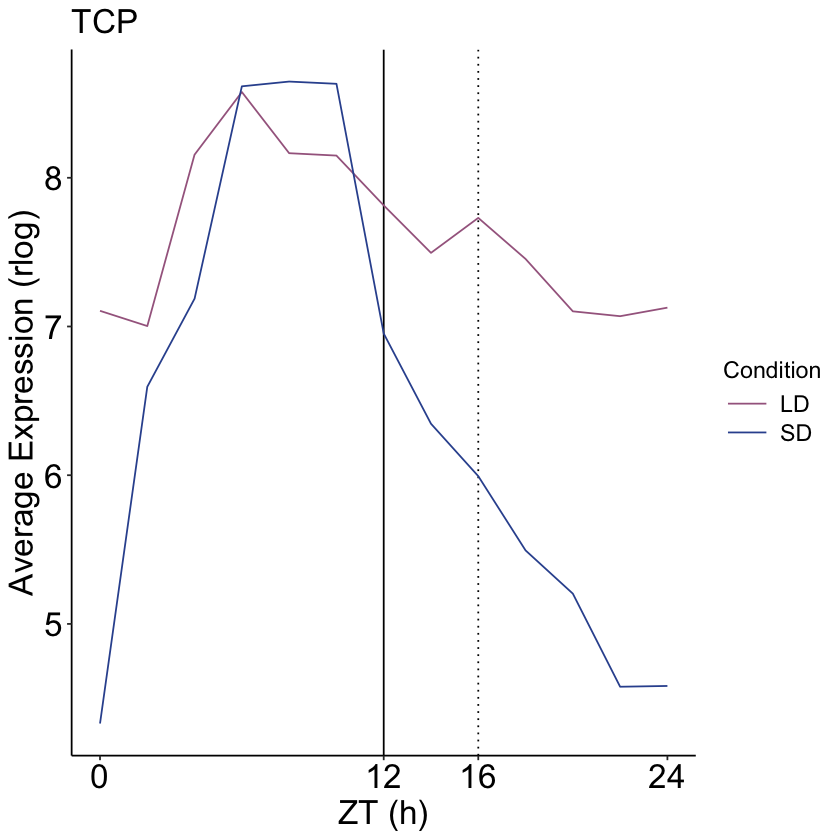

In [31]:

## Plot the TCP  transcript
#:::::::::::::::::::::::::::::::::::::::::::

LargeAmpDiff_TCP_plot <- SDLDsg %>% 
    filter (geneID %in% (LargeAmpDiff_Regulators %>% filter(str_detect(NAME,'TCP')) %>% pull(geneID))) %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                       # SDLD_rlog_ribbon_onePlot ('TCP')
SDLD_rlog_onePlot_single('TCP')
LargeAmpDiff_TCP_plot 

# Transcripts with increased amplitude under long days

In [32]:
LargeAmpDiff_SDLD_05 <- import(file= '../ATL_Diel_Phase_Aplitude_Analyses/Mercator_Results/20250409_LargeAmpDiff_SDLD_05_vs_Leaf_SDandLD_rhythmic.tsv', 
sep ='\t', header = TRUE, fill = TRUE)

In [33]:
colnames(LargeAmpDiff_SDLD_05 )<-make.names(colnames(LargeAmpDiff_SDLD_05))
colnames(LargeAmpDiff_SDLD_05)

[1] "MapMan4.category.number"                     
 [2] "Context.of.Protein.Function"                 
 [3] "X.Genes.of.Interest.IN.MapMan4.category"     
 [4] "Genes.of.Interest..List..IN.MapMan4.category"
 [5] "X.Genes.of.Interest.NOT.IN.MapMan4.category" 
 [6] "X.Background.Genes.IN.MapMan4.category"      
 [7] "X.Background.Genes.NOT.IN.MapMan4.category"  
 [8] "Enrichment.Factor"                           
 [9] "p.value"                                     
[10] "FDR.adjusted.p.value"

In [34]:
LargeAmpDiff_SDLD_05 %>% select(MapMan4.category.number,Context.of.Protein.Function) %>% unique()

,MapMan4.category.number,Context.of.Protein.Function
,<chr>,<chr>
1,1,Photosynthesis
2,1.1,Photosynthesis.photophosphorylation
3,1.1.1,Photosynthesis.photophosphorylation.photosystem II
4,1.1.1.1,Photosynthesis.photophosphorylation.photosystem II.LHC-II complex
5,1.1.1.1.1,Photosynthesis.photophosphorylation.photosystem II.LHC-II complex.component *(LHCb1/2/3)
6,1.1.1.1.4,Photosynthesis.photophosphorylation.photosystem II.LHC-II complex.component *(LHCb6)
7,1.1.4,Photosynthesis.photophosphorylation.photosystem I
8,1.1.4.1,Photosynthesis.photophosphorylation.photosystem I.LHC-I complex
9,1.1.4.1.3,Photosynthesis.photophosphorylation.photosystem I.LHC-I complex.component *(LHCa3)


In [35]:
# Need to correct the gene IDs/IDENTIFIERS
#:::::::::::::::::::::::::::::::::::;
#replace multiple patterns in name column
LargeAmpDiff_SDLD_05$Genes.of.Interest..List..IN.MapMan4.category<- gsub('SOLTU.ATL_V', 'Soltu.Atl_v',LargeAmpDiff_SDLD_05$Genes.of.Interest..List..IN.MapMan4.category)
          # gsub('g', 'G',MyList))

# Remove empty spaces
#:::::::::::::::::::::::;
LargeAmpDiff_SDLD_05$Genes.of.Interest..List..IN.MapMan4.category<- sub(" ", "", LargeAmpDiff_SDLD_05$Genes.of.Interest..List..IN.MapMan4.category)


## CHOOSE GENES: 1 Photosynthesis

In [36]:
##Make list of cell from dataframe, need to split the strings then make list:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
MyList<-as.list(strsplit(LargeAmpDiff_SDLD_05$Genes.of.Interest..List..IN.MapMan4.category[4], ",")[[1]])

In [37]:
# Remove empty spaces
#:::::::::::::::::::::::;
MyList<- sub(" ", "", MyList)
MyList[1:2]

[1] "Soltu.Atl_v3.08_2G011210.1" "Soltu.Atl_v3.06_4G013260.1"

In [38]:
# Make dataframe
MyDF<-data.frame(geneID = matrix(unlist(MyList)))
MyDF[1:2,]
nrow(MyDF)

[1] "Soltu.Atl_v3.08_2G011210.1" "Soltu.Atl_v3.06_4G013260.1"

[1] 85

`summarise()` has grouped output by 'ZT'. You can override using the `.groups`
argument.


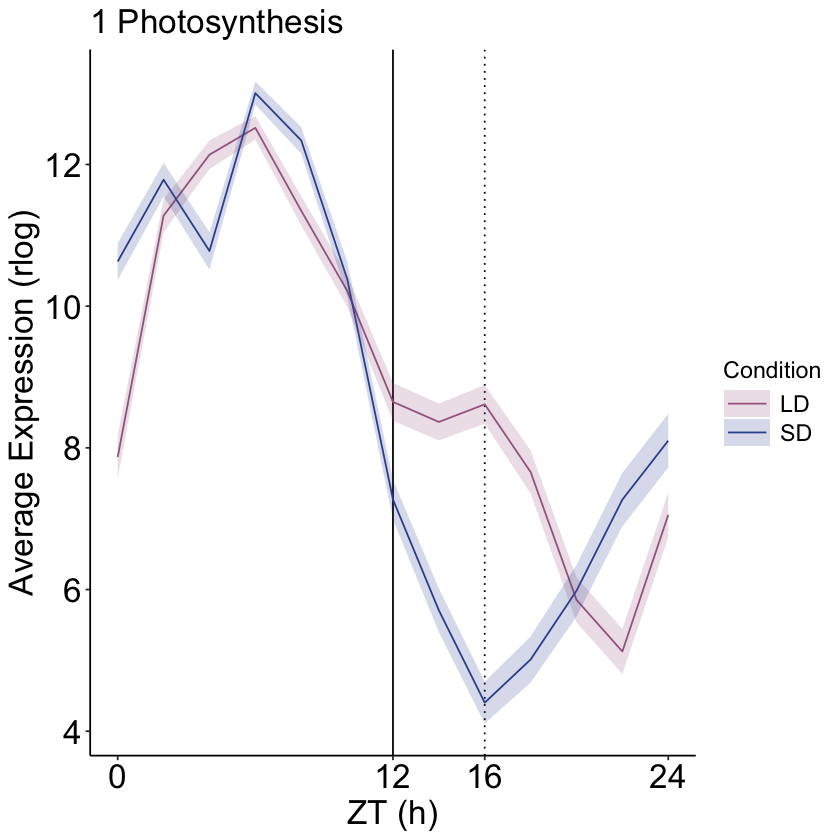

In [39]:
Photosynthesis_rlog_OnePlot <- SDLDsg %>% filter (geneID %in% MyDF$geneID)  %>% filter(Tissue == 'Leaf') %>% #Select only leaf data
                        SDLD_rlog_ribbon_onePlot(.,'1 Photosynthesis') 
Photosynthesis_rlog_OnePlot 

In [40]:
Photosynthesis_rlog_OnePlot %>% ggsave(file="./Results/Photosynthesis_rlog_OnePlot.pdf", width=5, height=4, dpi=600)

# Transcripts with at least 6 h phase delay in LD 

In [41]:
LD_delay_6h <- import(file= '../ATL_Diel_Phase_Aplitude_Analyses/Mercator_Results/20250420_Leaf_LD_delay_6h_VS_Leaf_SDandLD_rhythmic.tsv', 
sep ='\t', header = TRUE, fill = TRUE)

In [42]:
colnames(LD_delay_6h )<-make.names(colnames(LD_delay_6h))
colnames(LD_delay_6h )

[1] "MapMan4.category.number"                     
 [2] "Context.of.Protein.Function"                 
 [3] "X.Genes.of.Interest.IN.MapMan4.category"     
 [4] "Genes.of.Interest..List..IN.MapMan4.category"
 [5] "X.Genes.of.Interest.NOT.IN.MapMan4.category" 
 [6] "X.Background.Genes.IN.MapMan4.category"      
 [7] "X.Background.Genes.NOT.IN.MapMan4.category"  
 [8] "Enrichment.Factor"                           
 [9] "p.value"                                     
[10] "FDR.adjusted.p.value"

In [43]:
LD_delay_6h[1:2,]

,MapMan4.category.number,Context.of.Protein.Function,X.Genes.of.Interest.IN.MapMan4.category,Genes.of.Interest..List..IN.MapMan4.category,X.Genes.of.Interest.NOT.IN.MapMan4.category,X.Background.Genes.IN.MapMan4.category,X.Background.Genes.NOT.IN.MapMan4.category,Enrichment.Factor,p.value,FDR.adjusted.p.value
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,15.5.7.5,RNA biosynthesis.DNA-binding transcriptional regulation.beta-hairpin exposed by alpha/beta-scaffold structure.WRKY transcription factor activity,10,"SOLTU.ATL_V3.05_4G018150.1, SOLTU.ATL_V3.04_4G014110.1, SOLTU.ATL_V3.04_0G011690.1, SOLTU.ATL_V3.09_4G008480.4, SOLTU.ATL_V3.05_1G002610.3, SOLTU.ATL_V3.09_0G007230.4, SOLTU.ATL_V3.05_3G019010.1, SOLTU.ATL_V3.04_2G011580.1, SOLTU.ATL_V3.05_3G019000.1, SOLTU.ATL_V3.04_3G013380.1",706,15,8576,8,7.691e-06,0.00166
2,15.5.7.5.1,RNA biosynthesis.DNA-binding transcriptional regulation.beta-hairpin exposed by alpha/beta-scaffold structure.WRKY transcription factor activity.transcription factor *(WRKY),10,"SOLTU.ATL_V3.05_4G018150.1, SOLTU.ATL_V3.04_4G014110.1, SOLTU.ATL_V3.04_0G011690.1, SOLTU.ATL_V3.09_4G008480.4, SOLTU.ATL_V3.05_1G002610.3, SOLTU.ATL_V3.09_0G007230.4, SOLTU.ATL_V3.05_3G019010.1, SOLTU.ATL_V3.04_2G011580.1, SOLTU.ATL_V3.05_3G019000.1, SOLTU.ATL_V3.04_3G013380.1",706,15,8576,8,7.691e-06,0.00166


In [44]:
LD_delay_6h %>% select(MapMan4.category.number,Context.of.Protein.Function) %>% unique()

,MapMan4.category.number,Context.of.Protein.Function
,<chr>,<chr>
1,15.5.7.5,RNA biosynthesis.DNA-binding transcriptional regulation.beta-hairpin exposed by alpha/beta-scaffold structure.WRKY transcription factor activity
2,15.5.7.5.1,RNA biosynthesis.DNA-binding transcriptional regulation.beta-hairpin exposed by alpha/beta-scaffold structure.WRKY transcription factor activity.transcription factor *(WRKY)
3,17,Protein biosynthesis
4,17.1,Protein biosynthesis.ribosome biogenesis
5,17.1.2,Protein biosynthesis.ribosome biogenesis.large ribosomal subunit (LSU)
6,17.1.2.1,Protein biosynthesis.ribosome biogenesis.large ribosomal subunit (LSU).LSU proteome
7,17.1.2.1.14,Protein biosynthesis.ribosome biogenesis.large ribosomal subunit (LSU).LSU proteome.component *(uL14)
8,17.1.2.1.5,Protein biosynthesis.ribosome biogenesis.large ribosomal subunit (LSU).LSU proteome.component *(uL5)
9,17.1.3,Protein biosynthesis.ribosome biogenesis.small ribosomal subunit (SSU)


In [45]:
# Need to correct the gene IDs/IDENTIFIERS
#:::::::::::::::::::::::::::::::::::;
#replace multiple patterns in name column
LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category<- gsub('SOLTU.ATL_V', 'Soltu.Atl_v',LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category)
          # gsub('g', 'G',MyList))

# Remove empty spaces
#:::::::::::::::::::::::;
LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category<- sub(" ", "", LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category)


## CHOOSE GENES: 17.1 Protein biosynthesis.ribosome biogenesis 

In [46]:

##Make list of cell from dataframe, need to split the strings then make list:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
MyList<-as.list(strsplit(LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category[4], ",")[[1]])

In [47]:
# Remove empty spaces and correct capitalization
#:::::::::::::::::::::::;
MyList<- sub(" ", "", MyList)


MyList[1:2]

[1] "Soltu.Atl_v3.06_1G007090.1" "Soltu.Atl_v3.03_2G023040.1"

In [48]:
# Make dataframe
MyDF<-data.frame(geneID = matrix(unlist(MyList)))
MyDF[1:2,]
nrow(MyDF)

[1] "Soltu.Atl_v3.06_1G007090.1" "Soltu.Atl_v3.03_2G023040.1"

[1] 154

### Plot data

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


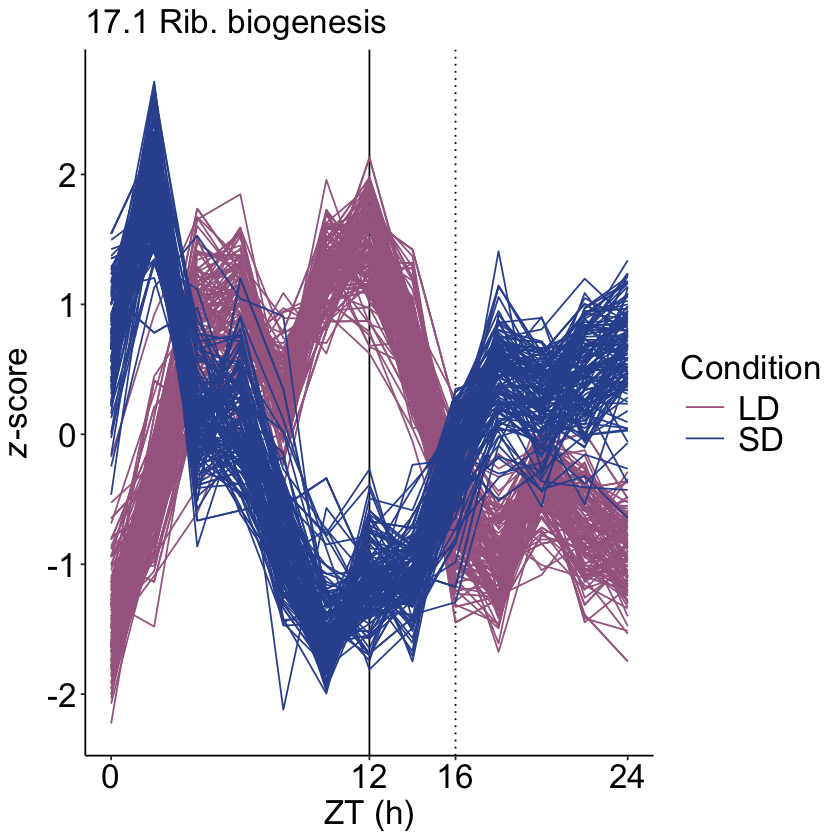

In [49]:


RibBio_z_OnePlot <- SDLDsg %>% filter (geneID %in% MyDF$geneID)  %>% filter(Tissue == 'Leaf') %>% #Select only leaf data
                        SDLD_z_onePlot(.,'17.1 Rib. biogenesis') 
  RibBio_z_OnePlot                    

In [50]:
RibBio_z_OnePlot %>% ggsave(file="./Results/RibBio_z_OnePlot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


## CHOOSE GENES: 26.10 Pathogen

In [51]:

##Make list of cell from dataframe, need to split the strings then make list:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
MyList<-as.list(strsplit(LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category[12], ",")[[1]])
# Remove empty spaces
#:::::::::::::::::::::::;
MyList<- sub(" ", "", MyList)

# Make dataframe
#:::::::::::::::::
MyDF<-data.frame(geneID = matrix(unlist(MyList)))
MyDF[1:2,]
nrow(MyDF)

[1] "Soltu.Atl_v3.10_0G004040.1" "Soltu.Atl_v3.06_2G022760.1"

[1] 41

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


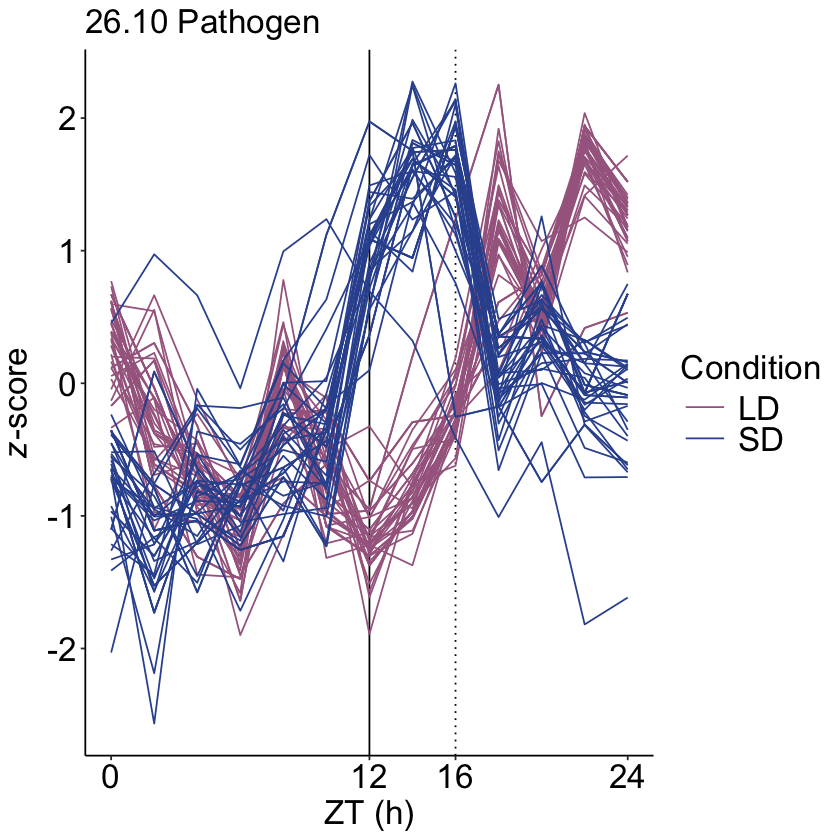

In [52]:
## Plot data
#:::::::::::::

Path_z_OnePlot <- SDLDsg %>% filter (geneID %in% MyDF$geneID)  %>% filter(Tissue == 'Leaf') %>% #Select only leaf data
                        SDLD_z_onePlot(.,'26.10 Pathogen') 
Path_z_OnePlot    

In [53]:
Path_z_OnePlot %>% ggsave(file="./Results/Path_z_OnePlot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


## CHOOSE GENES: 15.5.7.5 WRKRY

In [54]:

##Make list of cell from dataframe, need to split the strings then make list:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
MyList<-as.list(strsplit(LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category[1], ",")[[1]])
# Remove empty spaces
#:::::::::::::::::::::::;
MyList<- sub(" ", "", MyList)
# Make dataframe
#:::::::::::::::::
MyDF<-data.frame(geneID = matrix(unlist(MyList)))
MyDF[1:2,]
nrow(MyDF)


[1] "Soltu.Atl_v3.05_4G018150.1" "Soltu.Atl_v3.04_4G014110.1"

[1] 10

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


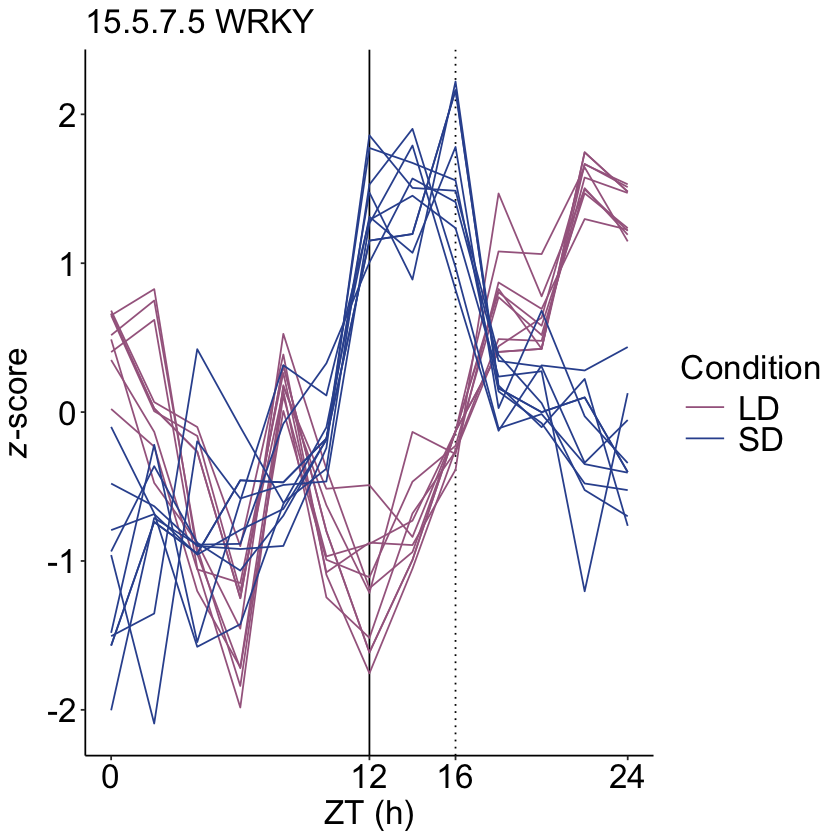

In [55]:
## Plot data
#:::::::::::::

WRKY_z_OnePlot <- SDLDsg %>% filter (geneID %in% MyDF$geneID)  %>% filter(Tissue == 'Leaf') %>% #Select only leaf data
                        SDLD_z_onePlot(.,'15.5.7.5 WRKY') 
WRKY_z_OnePlot   

In [56]:
WRKY_z_OnePlot  %>% ggsave(file="./Results/WRKY_z_OnePlot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


# TRB genes

In [57]:
TRBs<- import(file = '~/Dropbox/Potato/RNA-seq_2/TRB_RibosomalGenes/Data/ATL_TRBs_clean.csv', sep =',',
              header = TRUE, fill = TRUE )

In [58]:
## Add syntelog information
#:::::::::::::::::::::::;;

TRBs<- TRBs %>% left_join(SYN, by = c('GeneID'= 'target_id'))

In [59]:
TRBs

GeneID,Syntelog,geneID
<chr>,<chr>,<chr>
Soltu.Atl_v3.11_2G006760,Synt_27356,Soltu.Atl_v3.11_2G006760.2
Soltu.Atl_v3.11_4G013030,Synt_27356,Soltu.Atl_v3.11_4G013030.3
Soltu.Atl_v3.01_3G031700,Synt_3291,Soltu.Atl_v3.01_3G031700.2
Soltu.Atl_v3.01_1G030000,Synt_3291,Soltu.Atl_v3.01_1G030000.1
Soltu.Atl_v3.01_4G033820,Synt_3291,Soltu.Atl_v3.01_4G033820.2
Soltu.Atl_v3.11_1G011350,Synt_27356,Soltu.Atl_v3.11_1G011350.3
Soltu.Atl_v3.11_3G012740,Synt_27356,Soltu.Atl_v3.11_3G012740.7
Soltu.Atl_v3.03_0G008210,NA,NA
Soltu.Atl_v3.03_0G008090,NA,NA


In [60]:
## Plot SD vs LD
TRBs_LDSD_plot <- SDLDsg %>% filter (target_id %in% TRBs$GeneID) %>%  # get only expression data for your genes
                      
filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple('TRBs',4) # Since in this case I only 1 one gene I will only have 1 column

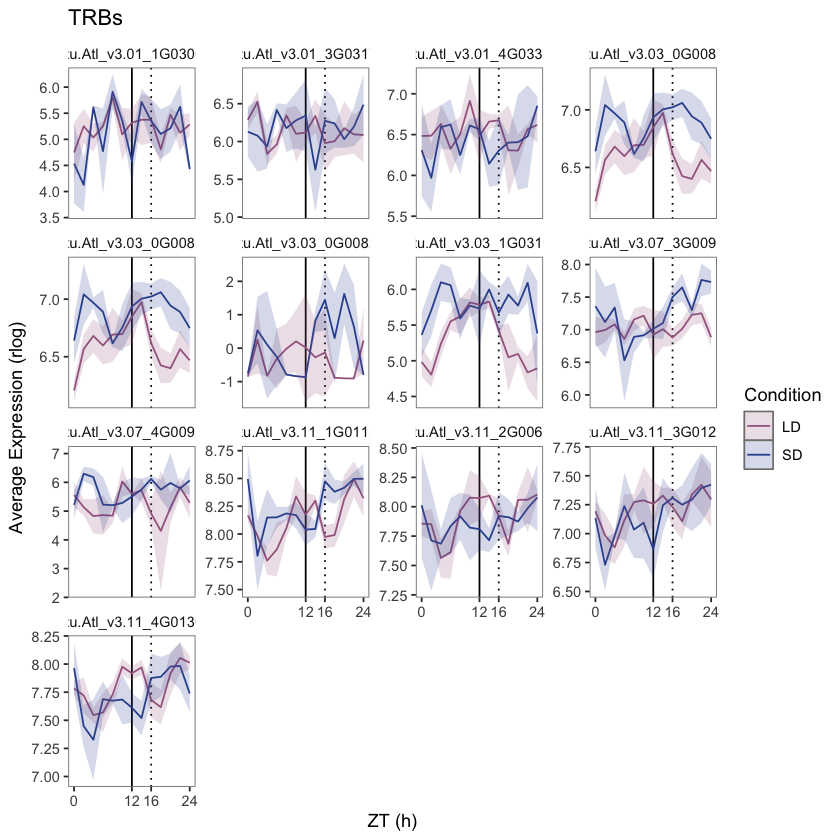

In [61]:
TRBs_LDSD_plot

#### Select only chromosome 3 TRB that according to our analyses phylogeny is similar to arabidopsis TRB 4 and 5 I name that gene TRB4/5a

In [62]:
TRB4_5_LDSD_plot <- SDLDsg %>% filter (target_id %in% TRBs$GeneID) %>%  # get only expression data for your genes
        filter(str_detect(target_id, 'v3.03_'))%>%
                      
        filter(Tissue == 'Leaf') %>% #Select only leaf short day data
                        SDLD_ribbon_plot_multiple('TRB4/5',4)

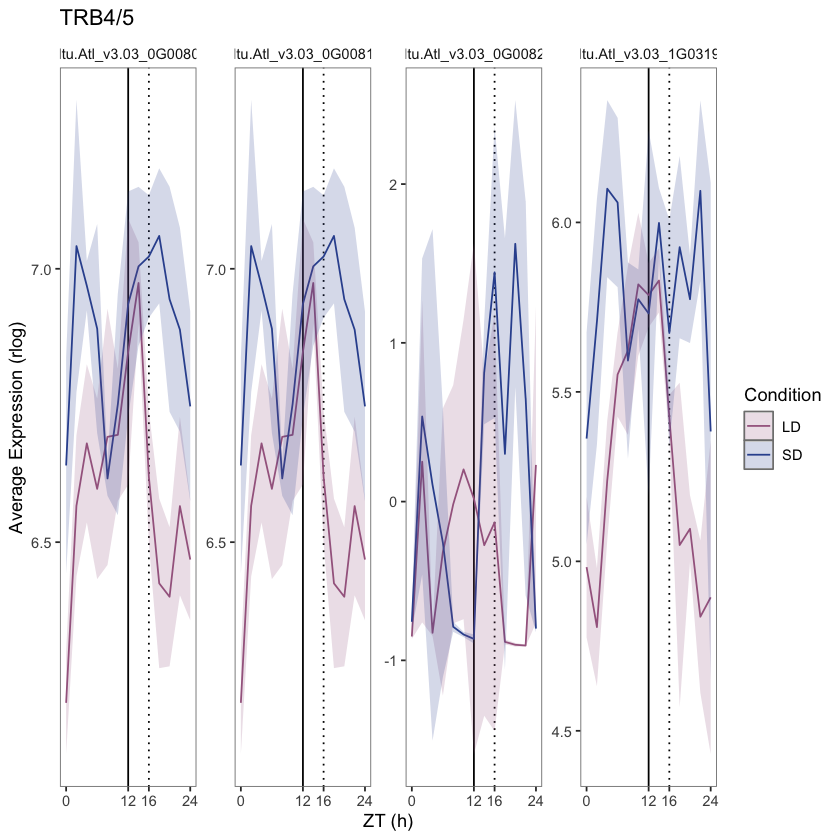

In [63]:
TRB4_5_LDSD_plot 

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


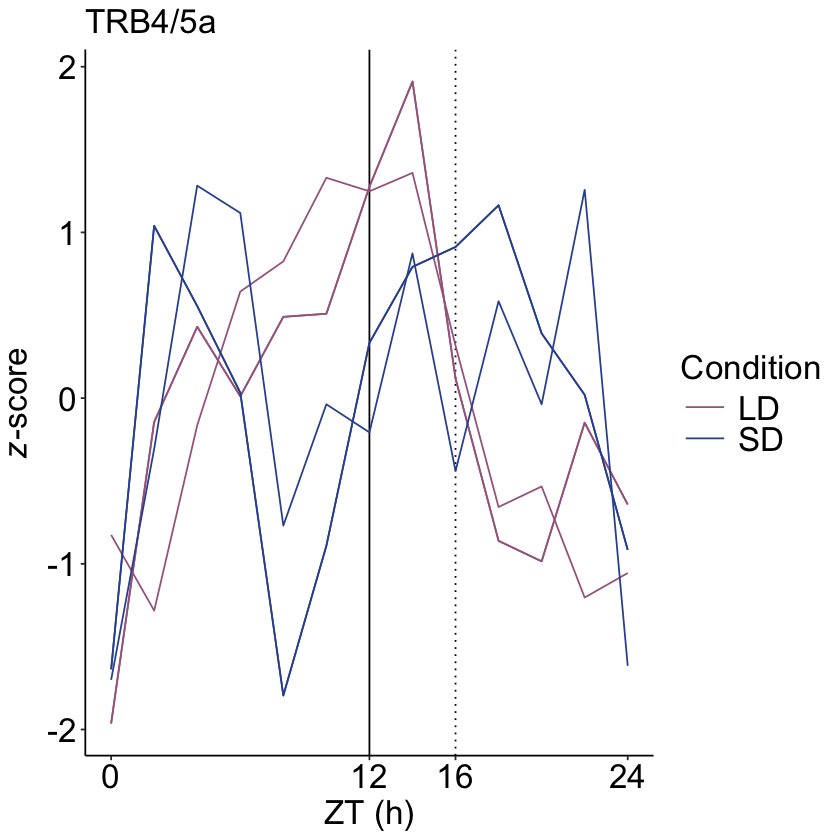

In [64]:
TRB45a_zScore_onePlot <- SDLDsg %>% filter (target_id %in% TRBs$GeneID) %>% filter(Tissue == 'Leaf') %>% #get only leaf expression data for your genes
        filter(str_detect(target_id, 'v3.03_'))%>%
                filter(target_id != 'Soltu.Atl_v3.03_0G008210') %>% # remove low expressed genes
                        SDLD_z_onePlot(.,'TRB4/5a') # Since in this case I only 1 one gene I will only have 1 col
TRB45a_zScore_onePlot

In [65]:
TRB45a_zScore_onePlot %>% ggsave(file="./Results/TRB45a_zScore_onePlot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


# Expression of other ribosome biogenesis related genes 

## Do other genes in this functional category also display the large differences in gene expression?

In [66]:
# Import ATL Mercator annotation
#:::::::::::::::::::::::::::::::::::
Mercator <- import(file = 
paste('../Data/ATL_Mercator_Annot.csv'), 
                   sep =',', header = TRUE, fill = TRUE )

In [67]:
Mercator[1:2,]

,geneID,Annotation,BINCODE,NAME,DESCRIPTION,TYPE,target_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Soltu.Atl_v3.01_0G000010.1,hypothetical protein,35.2,No Mercator4 annotation.no other annotation available,mercator4v6.0: not classified & original description: none,T,Soltu.Atl_v3.01_0G000010
2,Soltu.Atl_v3.01_0G000020.1,60S acidic ribosomal protein family,17.1.2.1.46,Protein biosynthesis.ribosome biogenesis.large ribosomal subunit (LSU).LSU proteome.component *(RPP1),mercator4v6.0: component *(RPP1) of large ribosomal-subunit (LSU) proteome & original description: none,T,Soltu.Atl_v3.01_0G000020


In [68]:
## What is the number of genes in ribosome biogenesis related genes
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Mercator %>% filter(str_detect(BINCODE, 
                                     '17.1.2')) %>% select(geneID) %>% unique() %>% nrow()
Mercator %>% filter(str_detect(BINCODE, 
                                     '17.1.3')) %>% select(geneID) %>% unique() %>% nrow()

[1] 719

[1] 471

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


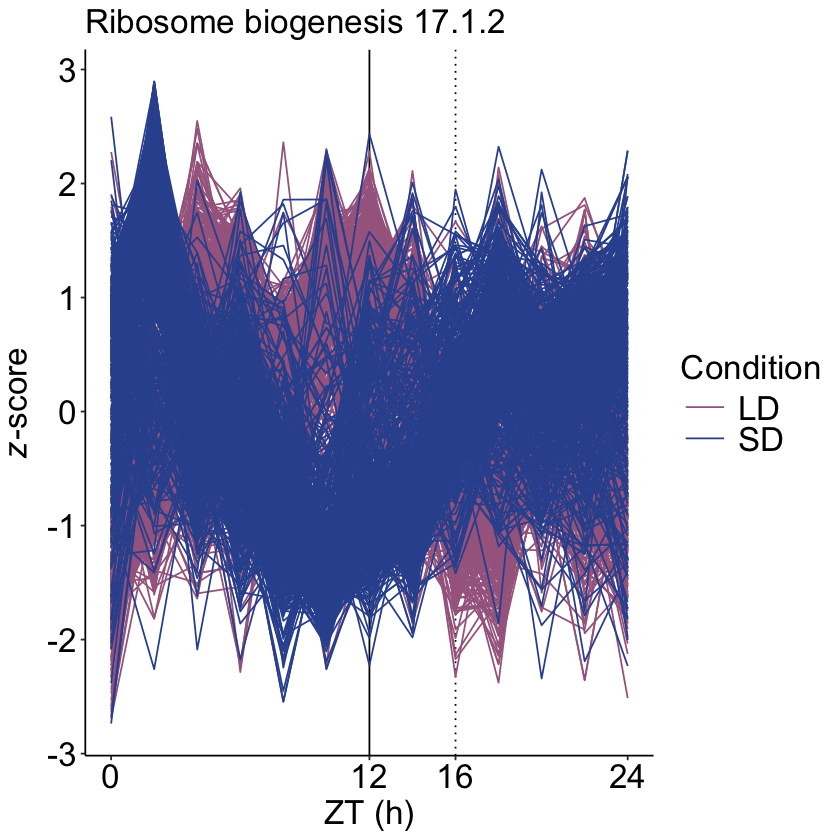

In [69]:
## Expression pattern of genes in MapMan category 17.1.2
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
RibBio17_1_2_zScore_onePlot <- SDLDsg %>% filter (geneID %in% (Mercator %>% filter(str_detect(BINCODE, 
                                     '17.1.2')) %>% pull(geneID) %>% unique())) %>% filter(Tissue == 'Leaf') %>% #get only leaf expression data for your genes
       
               
                        SDLD_z_onePlot(.,'Ribosome biogenesis 17.1.2') 
RibBio17_1_2_zScore_onePlot 

In [70]:
RibBio17_1_2_zScore_onePlot  %>% ggsave(file="./Results/RibBio17_1_2_zScore_onePlot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”


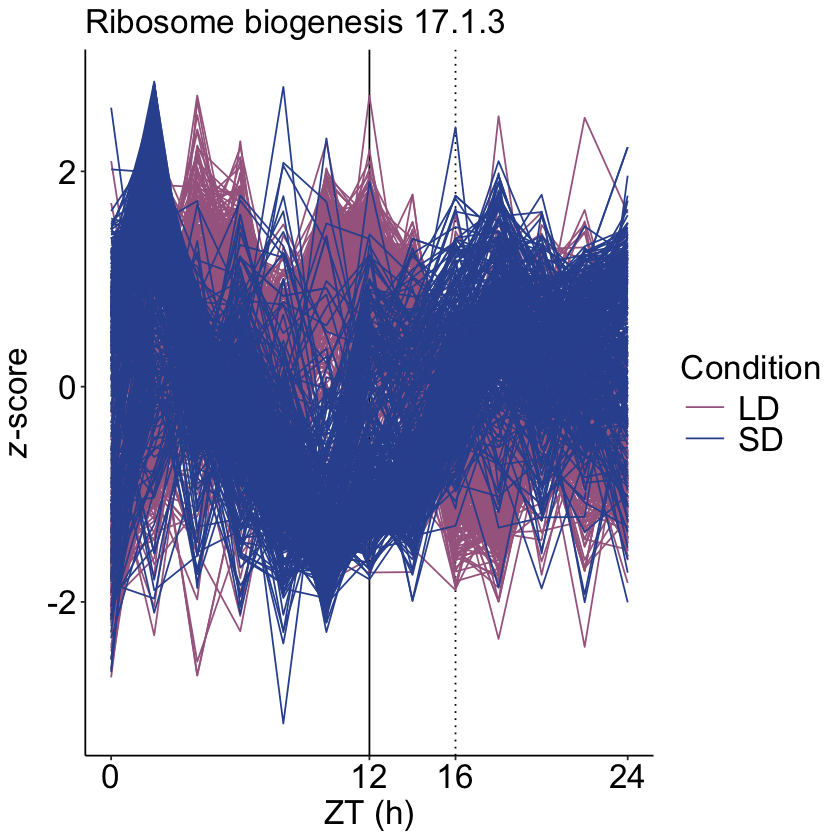

In [71]:
## Expression pattern of genes in MapMan category 17.1.3
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
RibBio17_1_3_zScore_onePlot <- SDLDsg %>% filter (geneID %in% (Mercator %>% filter(str_detect(BINCODE, 
                                     '17.1.3')) %>% pull(geneID) %>% unique())) %>% filter(Tissue == 'Leaf') %>% #get only leaf expression data for your genes
       
               
                        SDLD_z_onePlot(.,'Ribosome biogenesis 17.1.3') 
RibBio17_1_3_zScore_onePlot 

In [72]:
RibBio17_1_3_zScore_onePlot %>% ggsave(file="./Results/RibBio17_1_3_zScore_onePlot.pdf", width=5, height=4, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
fill values.”
